In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression # логистическая регрессия. Есть ещё версия с кросс-валидацией
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [2]:
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
# смотрим, кто сдал тест и кто нет
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

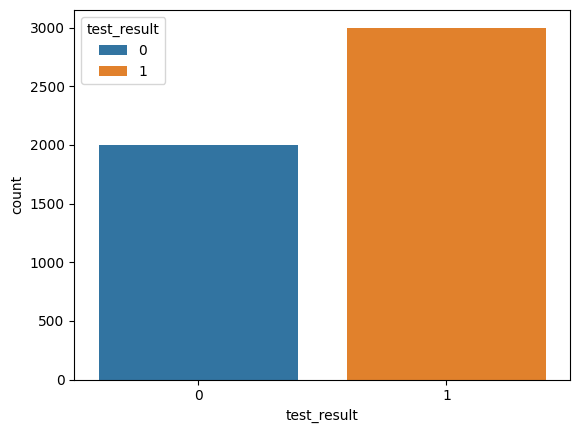

In [5]:
sns.countplot(data=df, x='test_result', hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

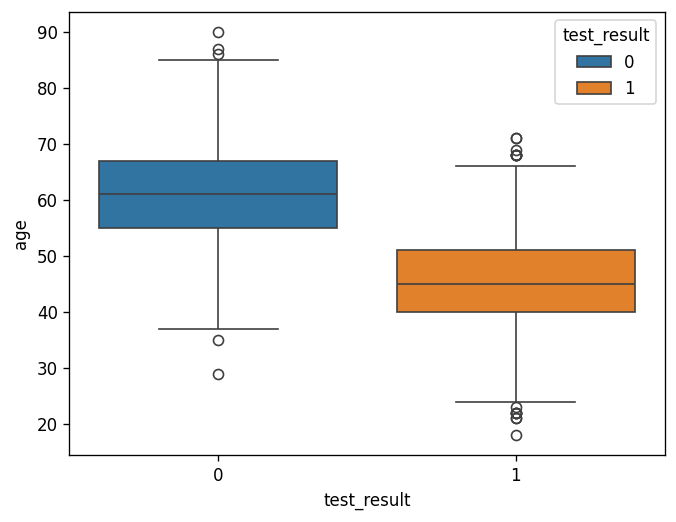

In [6]:
plt.figure(dpi=120)
sns.boxplot(data=df, x='test_result', y='age', hue='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

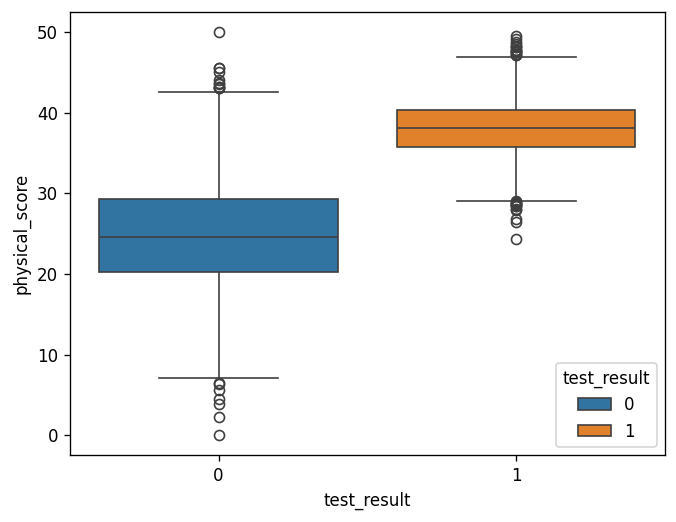

In [7]:
plt.figure(dpi=120)
sns.boxplot(data=df, x='test_result', y='physical_score', hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

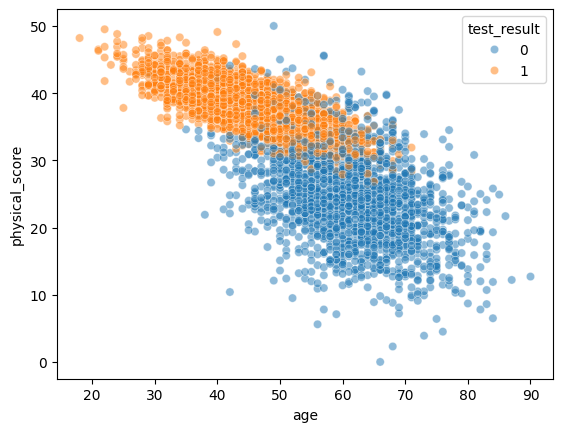

In [8]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha = 0.5)

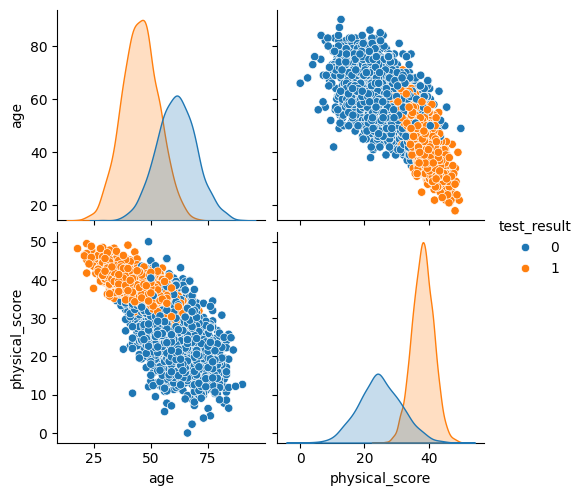

In [9]:
# для задачи классификации можно сразу график такой строить
sns.pairplot(df, hue='test_result')

<Axes: >

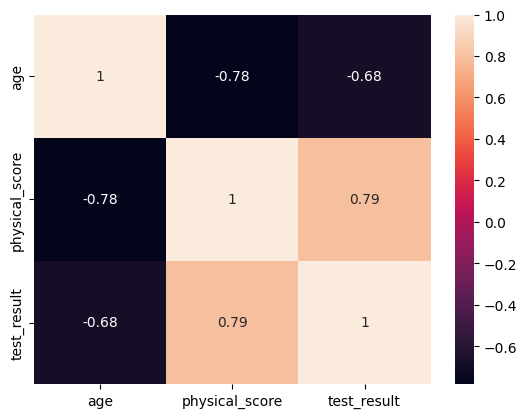

In [10]:
# ещё полезная тепловая карта heatmap для корреляции данных
sns.heatmap(data=df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

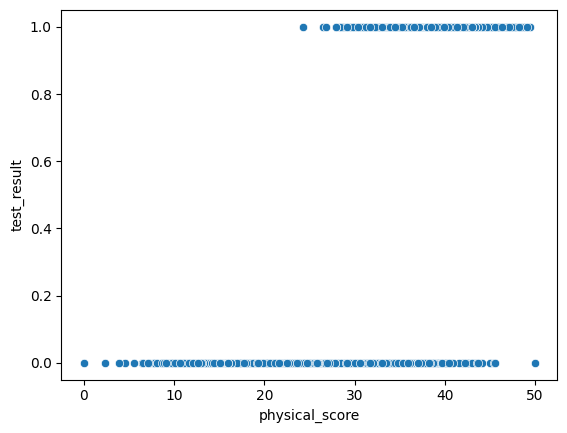

In [11]:
sns.scatterplot(x='physical_score', y='test_result', data=df)
# этот график не всегда является информативным
# лучше рисовать boxplot для категориальных данных

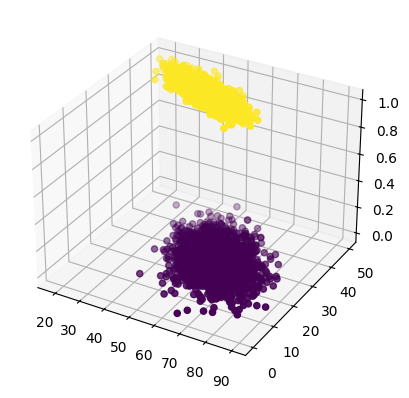

In [12]:
#3D-график для одного категориального признака
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(xs=df['age'], ys = df['physical_score'], zs=df['test_result'], c = df['test_result']);

In [13]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [14]:
# Создание и обучение модели логистической регрессии
X = df.drop('test_result', axis=1)
y = df['test_result']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [21]:
log_model.coef_ # коэффициенты для age и physical_score

array([[-0.95017725,  3.46148946]])

In [22]:
y_pred = log_model.predict(scaled_X_test)

In [23]:
#y_pred - значения целевой переменной

In [24]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [25]:
# Оценка вероятностей для каждой точки о принадлежности к той или иной категории
y_pred_proba = log_model.predict_proba(scaled_X_test)

In [26]:
y_pred_proba

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [27]:
# для оценки модели нужно поговорить о метриках задач классификации
# Accuracy
# Precision
# Recall
# Для удобства также строят ROC-кривые для анализа данных

In [28]:
log_model.coef_ # 1 - age, 2- physical score
# отрицательное значение - чем выше возраст, тем меньше вероястность пройти тест
# положительное - с ростом физических возможность вероятность пройти тест выше

array([[-0.95017725,  3.46148946]])

In [29]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [30]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [31]:
y_pred= log_model.predict(scaled_X_test)

In [32]:
#y_pred

In [33]:
accuracy_score(y_test, y_pred)

0.93

In [34]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

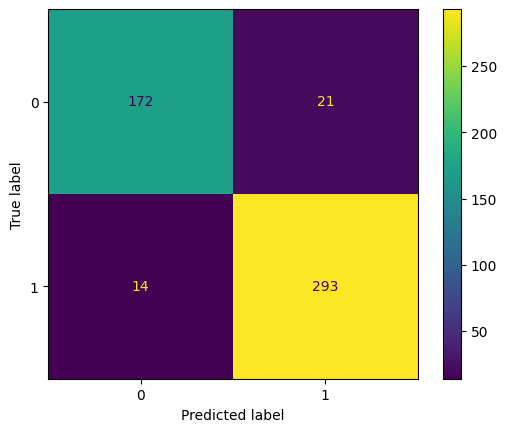

In [36]:
# визуализация матрицы ошибок
# без нормализации - сами значения
# с нормализацией - значения от 0 до 1 - normalize = 'all'
# можно работать в любом случае
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test);

In [37]:
# вывод метрик precision, recall, f1-score
# support - количество случаев в данных
# 193 и 307 - более менее данные сбалансированные
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [38]:
precision_score(y_test, y_pred)

0.9331210191082803

In [39]:
recall_score(y_test, y_pred)

0.9543973941368078

In [40]:
# адекватные значения по метрикам классификации

In [41]:
# графики ROC и precision-recall

In [42]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

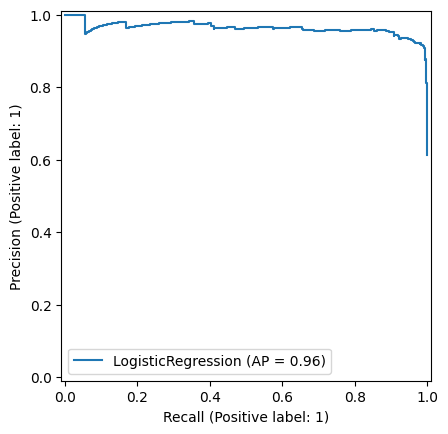

In [43]:
# precision-recall
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

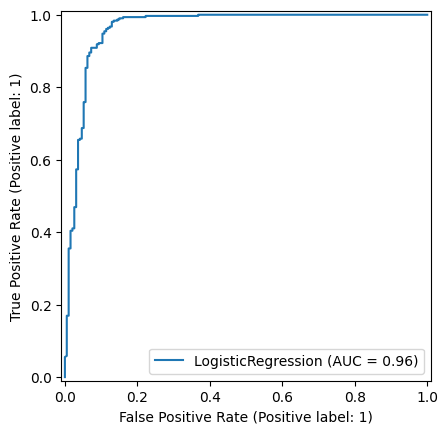

In [44]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)